In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
img_path="img/train_200707"
img_row=224#360
img_col=224#480

In [3]:
# xx and yy are 200x200 tables containing the x and y coordinates as values
# mgrid is a mesh creation helper
from PIL import Image
from skimage.draw import (line, polygon, disk,
                          circle_perimeter,
                          ellipse, ellipse_perimeter,
                          bezier_curve)

def make_circle(img_id):
    th=1000#1600
    donut=np.zeros((th,th))
    donut=donut==1
    for i in range(12):
        r=th/2-np.random.randint(th/8)
        r2=(r)**2
        rng1 = 12+ np.random.random()*5
        rng2 = np.random.random()*1.5
        rng=rng1 if i is 0 else rng2
        rng=(th+rng)**2 - (th)**2
        xx, yy = np.mgrid[:th, :th]
        # circles contains the squared distance to the (100, 100) point
        # we are just using the circle equation learnt at school
        circle = (xx - th//2) ** 2 + (yy - th//2) ** 2
        # donuts contains 1's and 0's organized in a donut shape
        # you apply 2 thresholds on circle to define the shape
        donut1= np.logical_and(circle < (r2 +rng), circle > (r2 - rng))
        donut=np.bitwise_or(donut, donut1)

#    f,ax=plt.subplots(1,2,figsize=(12,6))
#    ax[0].imshow(donut)
    off=30
    partition=np.random.randint(0,4)

    yy1=np.random.randint(0, off)
    xx1=np.random.randint(0, th-img_col-off)

    yy2=np.random.randint(th-img_row-off, th-img_row)
    xx2=np.random.randint(0,th-img_col-off)

    yy3=np.random.randint(0,th-img_row-off)
    xx3=np.random.randint(0,off)

    yy4=np.random.randint(0,th-img_row-off)
    xx4=np.random.randint(th-img_col-off,th-img_col)

    xx=[xx1,xx2,xx3,xx4]
    yy=[yy1,yy2,yy3,yy4]

    x_off=np.int(xx[partition])
    y_off=np.int(yy[partition])
    crop_img=donut[y_off:y_off+img_row,x_off:x_off+img_col]
#     for i in range(30):
#         nsize=5
#         y_noise_pos=np.random.randint(0,360-nsize)
#         x_noise_pos=np.random.randint(0,480-nsize)
#         y_size=nsize*np.random.random()
#         x_size=nsize*np.random.random()
#         rr, cc = ellipse(y_noise_pos, x_noise_pos, y_size, x_size, crop_img.shape)
#         crop_img[rr, cc] = True
    
#    ax[1].imshow(crop_img)
    plt.show() 
    return crop_img


## Make random image

In [ ]:
for i in range(11000,11010,1):
    #to prevent mistake
    img=make_circle(i)
    im=Image.fromarray(img)
    im.save(img_path+"%d.jpg"%i)
    if i%100==0:
        print(f"make image {i}/4000")

In [ ]:
from skimage.segmentation import flood, flood_fill
def find_max_area(img,row,col):
    canvas=np.zeros_like(img)
    colors=1
    for r in range(row):
        for c in range(col):
            if img[r,c]!=0 and canvas[r,c] == 0:
                filled_checkers = flood_fill(img, (r, c), colors)
                filled_checkers = filled_checkers==colors
                canvas = canvas + np.uint8(filled_checkers)*colors
                colors+=1
    arr=[]
    for color in range(1,colors,1):
        arr.append((canvas==color).sum())
    max_color=0
    max_val=0
    for i,val in enumerate(arr):
        if max_val<val:
            max_val=val
            max_color=i
    return canvas, max_color+1,colors

## My Test

In [ ]:
fn=img_path+"10000.png"
img=Image.open(fn)

f,ax=plt.subplots(1,3,figsize=(14,8))
ax[0].imshow(img)
img=np.uint8(img)*255
ax[1].imshow(img)
canvas, max_color,colors=find_max_area(img,img_row,img_col)
ax[2].imshow((canvas==max_color))


## make mask from image

In [ ]:
import os
files=os.listdir(img_path)
for fn in files:
    img=Image.open(img_path+fn)
    img=np.uint8(img)*255
    canvas, max_color,colors=find_max_area(img,img_row,img_col)
    mask=np.uint8(canvas==max_color)
    im=Image.fromarray(mask*255)
    im.save(img_path+f"{fn.split('.')[0]}_mask.png")
    


In [ ]:
fn.split('.')


In [ ]:
canvas.sum(),mask.sum()

In [ ]:
colors=1
for r in range(row):
    for c in range(col):
        if img[r,c]!=0 and canvas[r,c] == 0:
            filled_checkers = flood_fill(img, (r, c), colors, tolerance=10)
            filled_checkers = filled_checkers==colors
            canvas = canvas + np.uint8(filled_checkers)*colors
            colors+=1


In [ ]:
canvas.max()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters
from skimage.segmentation import flood, flood_fill


checkers = img#data.checkerboard()

# Fill a square near the middle with value 127, starting at index (76, 76)
filled_checkers = flood_fill(checkers, (276, 276), 127)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(checkers, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(filled_checkers, cmap=plt.cm.gray)
ax[1].plot(76, 76, 'wo')  # seed point
ax[1].set_title('After flood fill')
ax[1].axis('off')

plt.show()

(-0.5, 499.5, 499.5, -0.5)

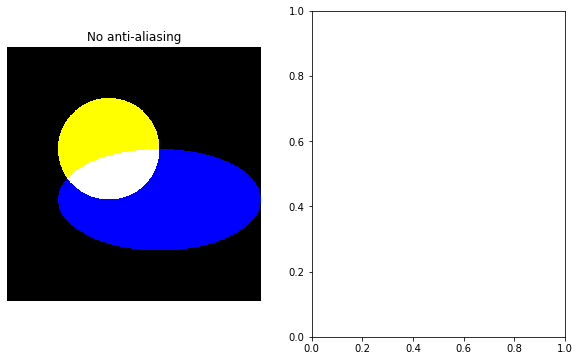

In [4]:
from skimage.draw import polygon
from skimage.draw import (line, polygon, disk,
                          circle_perimeter,
                          ellipse, ellipse_perimeter,
                          bezier_curve)

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))
img = np.zeros((500, 500, 3), dtype=np.double)


# fill polygon
poly = np.array((
    (300, 300),
    (480, 320),
    (380, 430),
    (220, 590),
    (300, 300),
))
# rr, cc = polygon(poly[:, 0], poly[:, 1], img.shape)
# img[rr, cc, 1] = 1

# fill circle
rr, cc = disk((200, 200), 100, shape=img.shape)
img[rr, cc, :] = (1, 1, 0)

# fill ellipse
rr, cc = ellipse(300, 300, 100, 200, img.shape)
img[rr, cc, 2] = 1

ax1.imshow(img)
ax1.set_title('No anti-aliasing')
ax1.axis('off')

In [ ]:
import skimage
max_size = 50 # Assuming it's square
max_vertices = 6 # length of your coord vector
coords = np.random.randint(0,high=max_size, size=[2, max_vertices])
# Here you got all the coordinates laying inside the polygon
rr, cc = skimage.draw.polygon(coords)

# Now you have to pick an element from rr and the corresponding from cc
# The simplest way is to pick its position in rr or cc
random_index = np.random.choice(list(range(len(rr))))
random_point = (rr[random_index], cc[random_index])

In [ ]:
import skimage

In [ ]:
>>> image_shape = (128, 128)
>>> polygon = np.array([[60, 100], [100, 40], [40, 40]])
>>> mask = polygon2mask(image_shape, polygon)
>>> mask.shape
(128, 128)

In [ ]:
def imshow(title, img,cmap="gray"):
    plt.title(title)
    plt.imshow(img,cmap=cmap)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,7))
ax[0].imshow(img)
ax[1].imshow(thresh,cmap="gray")

In [ ]:
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 10
params.maxThreshold = 255
params.filterByArea = False
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

# params.minArea = 1
        
detector = cv2.SimpleBlobDetector_create(params) # Blob detector 선언
keypoints = detector.detect(thresh)  # Blob labeling 수행


In [ ]:
len(keypoints)

In [ ]:
im_with_keypoints = \
cv2.drawKeypoints(thresh, keypoints, np.array([]), (255, 0, 0),
                  cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # 원본 이미지에 찾은 blob 그리기

plt.figure(figsize=(7,7))
plt.imshow(im_with_keypoints)
plt.title('Coin keypoint', size=15)
plt.show()

In [ ]:
sns.countplot(thresh.flatten())

In [ ]:
num_labels, labels_im = cv2.connectedComponents(thresh)

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    imshow('labeled.png', labeled_img)

imshow_components(labels_im)

In [ ]:
sns.countplot(labels_im.flatten())

In [ ]:
df=pd.DataFrame({"a":labels_im.flatten()})

In [ ]:
tar=df.a.value_counts()[:4].index.tolist()[1]

In [ ]:
imshow("sel",(labels_im==tar).astype(np.uint8))

In [ ]:
imshow("origin",img)

## Threshold Range

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

img = cv2.imread('threshold.jpg')#io.imread('https://i.stack.imgur.com/J46nA.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:

# Use fixed threshold to mask black areas
_, thresh = cv2.threshold(gray, 90, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)
thresh3=thresh-thresh2

In [ ]:
f,ax=plt.subplots(1,3,figsize=(15,6))
ax[0].imshow(thresh,cmap="gray")
ax[1].imshow(thresh2,cmap="gray")
ax[2].imshow(thresh3,cmap="gray")

In [ ]:
plt.imshow(thresh2,cmap="gray")

In [ ]:
255-gray